<a href="https://colab.research.google.com/github/Pathway2008/CarPrice/blob/main/electric_auto_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [29]:
train = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
nan_counts = train['배터리용량'].isna().groupby(train['모델']).sum().reset_index(name='NaN_개수')

manufacturer_model_df = (
    train.groupby(['제조사', '모델'])
    .size()
    .reset_index(name='모델_개수')
    .merge(nan_counts, on='모델', how='left')
)

# 제조사별 내림차순 및 모델 개수별 내림차순으로 정렬
manufacturer_model_df = manufacturer_model_df.sort_values(
    by=['제조사', '모델_개수'],
    ascending=[True, False]
).reset_index(drop=True)

In [ ]:
manufacturer_model_df

,제조사,모델,모델_개수,NaN_개수
0,A사,RSeTGT,385,282
1,A사,eT,379,51
2,A사,Q4eT,378,150
3,B사,i5,414,79
4,B사,i3,388,61
5,B사,iX,367,291
6,H사,ION6,379,144
7,H사,KNE,365,122
8,H사,ION5,353,133
9,H사,IONIQ,140,32


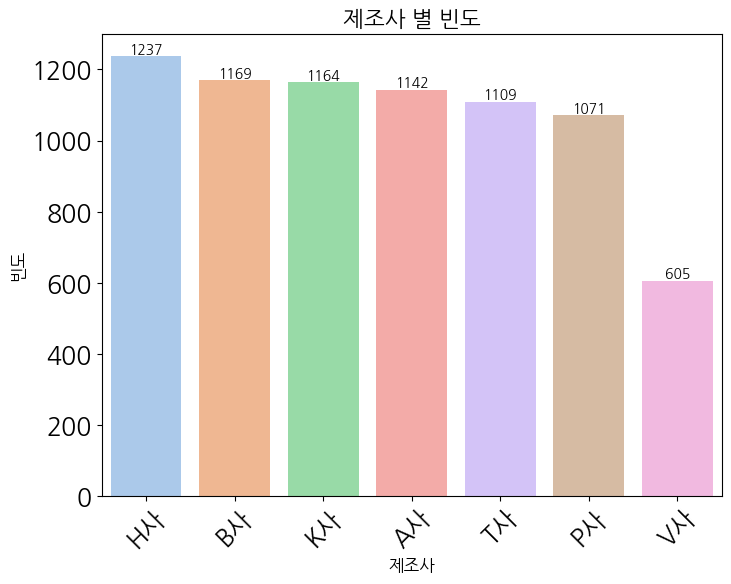

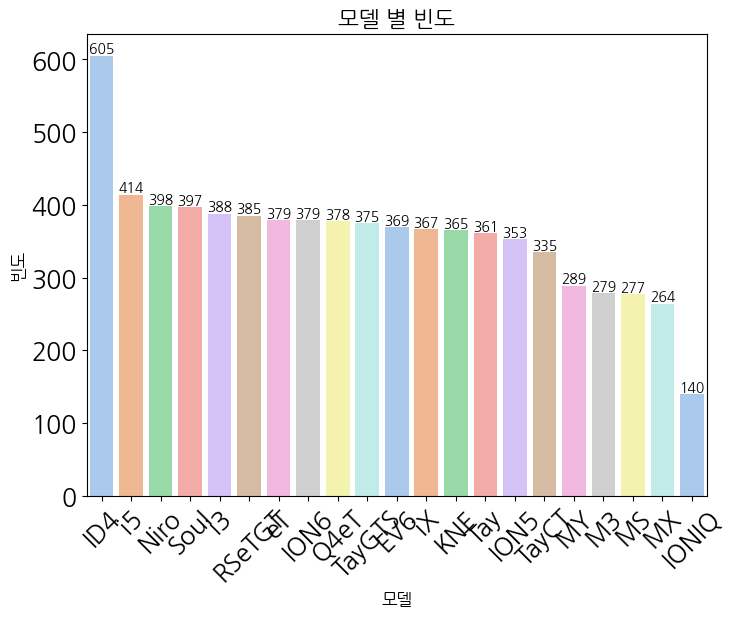

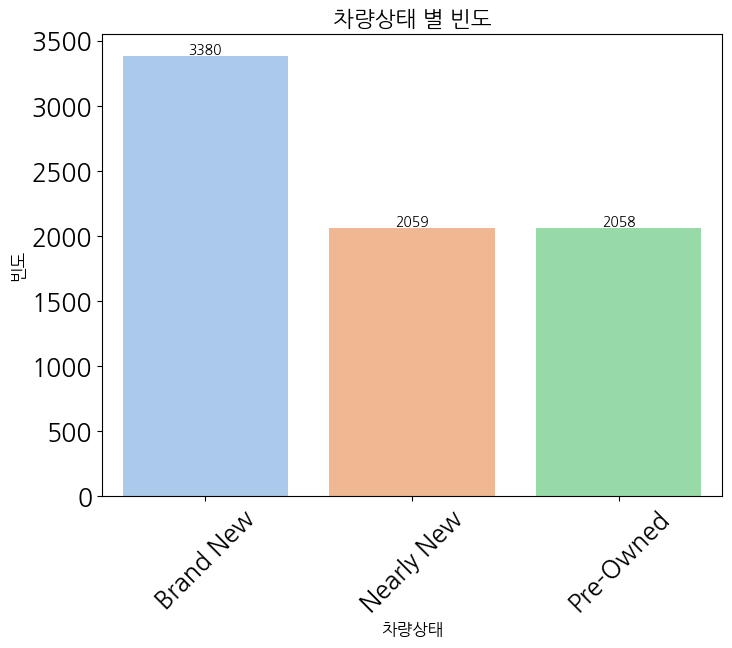

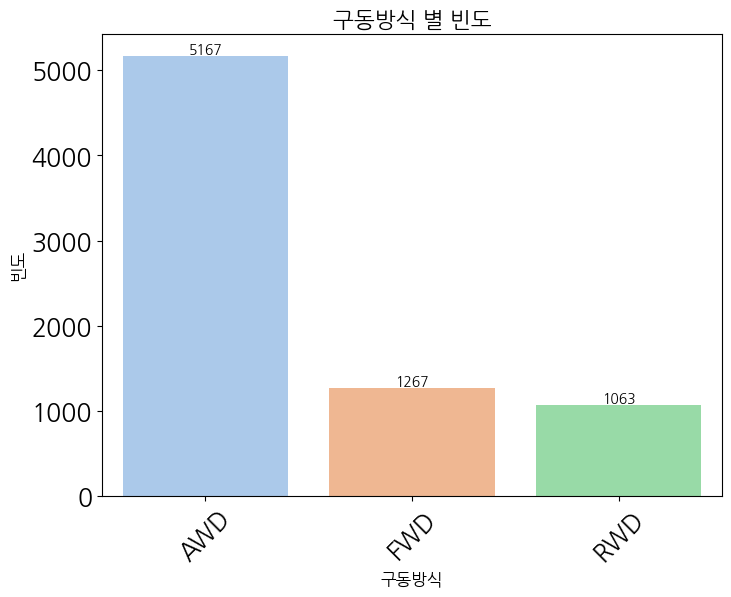

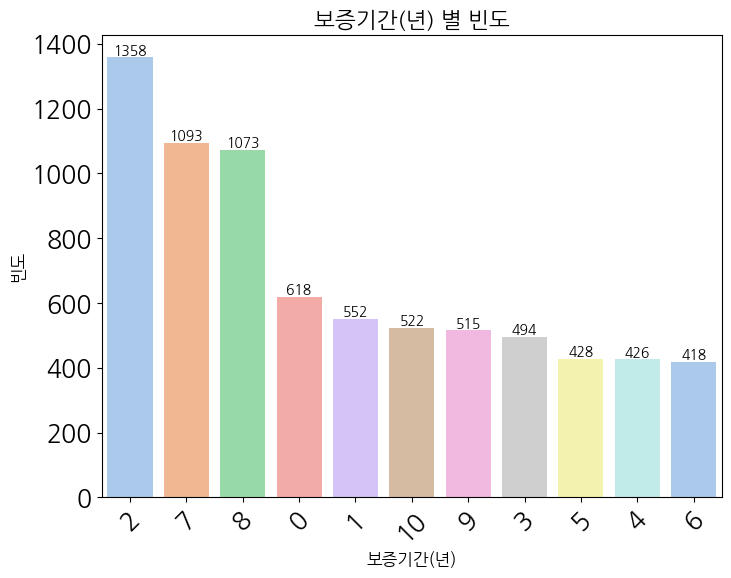

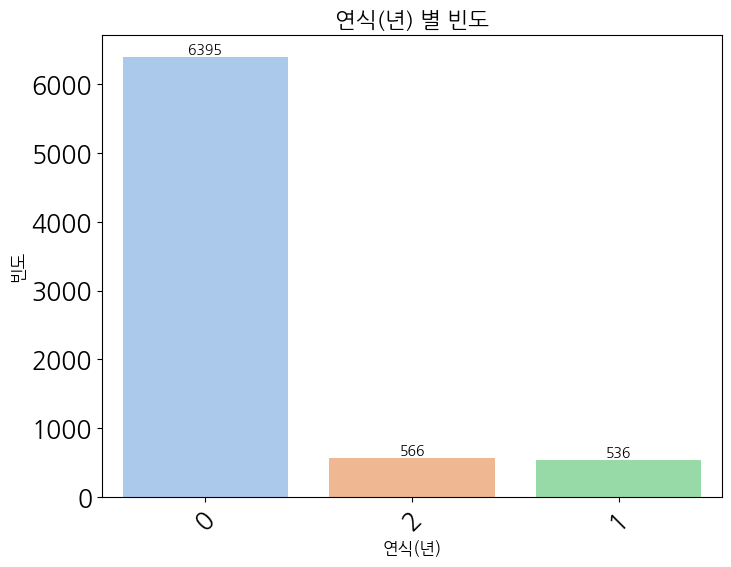

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 생성 함수
def plot_countplot(data, column, figsize=(8, 6), palette='pastel'):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=column, palette=palette, order=data[column].value_counts().index)

    # 막대 위에 값 표시
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    plt.title(f'{column} 별 빈도', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# 각 컬럼에 대해 그래프 생성
columns_to_plot = ['제조사', '모델', '차량상태', '구동방식', '보증기간(년)', '연식(년)']
for col in columns_to_plot:
    plot_countplot(train, col)

In [ ]:
# 제조사별 모델 분포를 시각화 (countplot)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train, x='제조사', hue='모델', palette='pastel')

# 그래프 제목과 축 레이블 설정
plt.title('제조사별 모델 분포', fontsize=16)
plt.xlabel('제조사', fontsize=12)
plt.ylabel('빈도', fontsize=12)

# 범례 표시
plt.legend(title='모델', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

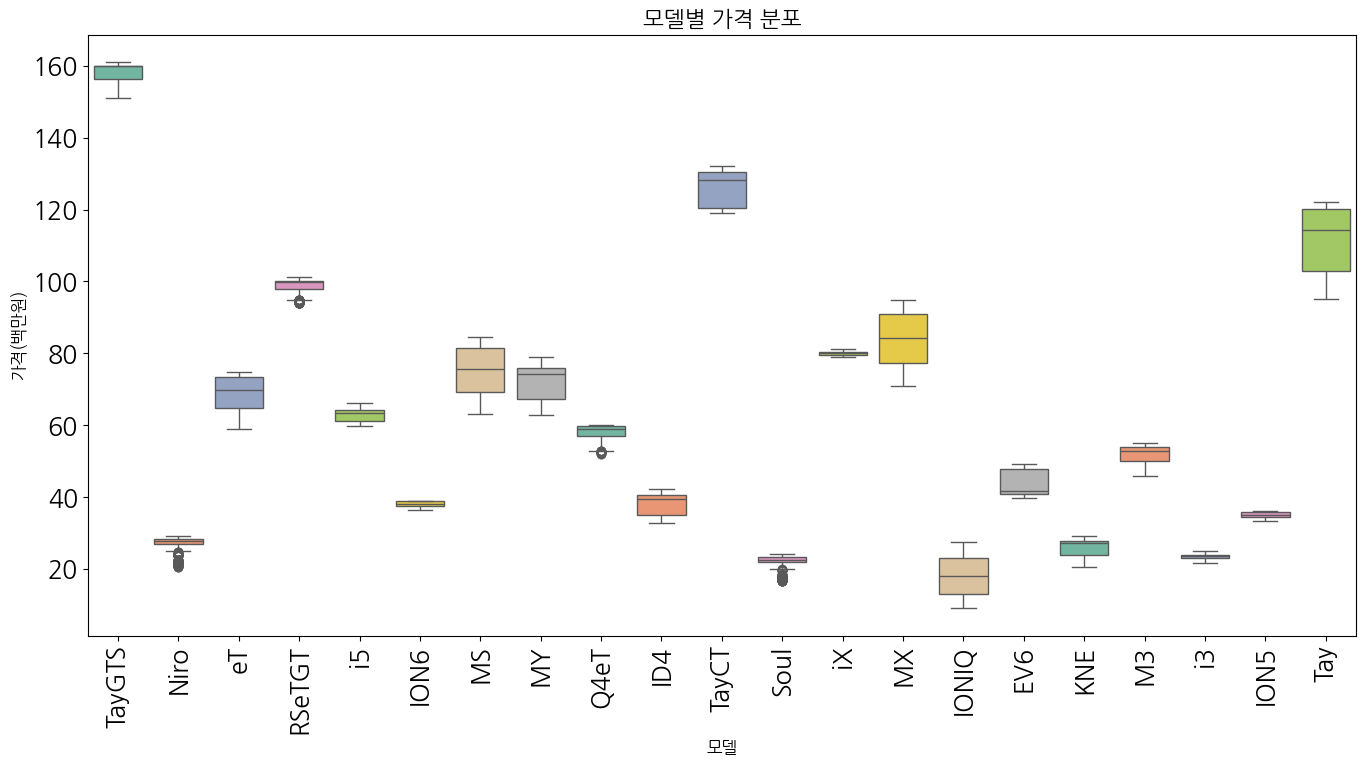

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

# 모델별 가격 분포 시각화 (박스 플롯)
plt.figure(figsize=(14, 8))  # 그래프 크기 설정
sns.boxplot(data=train, x='모델', y='가격(백만원)', palette='Set2')

# 그래프 제목과 라벨 설정
plt.title('모델별 가격 분포', fontsize=16)
plt.xlabel('모델', fontsize=12)
plt.ylabel('가격(백만원)', fontsize=12)

# x축 레이블이 겹치지 않도록 회전
plt.xticks(rotation=90)

# 그래프 표시
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

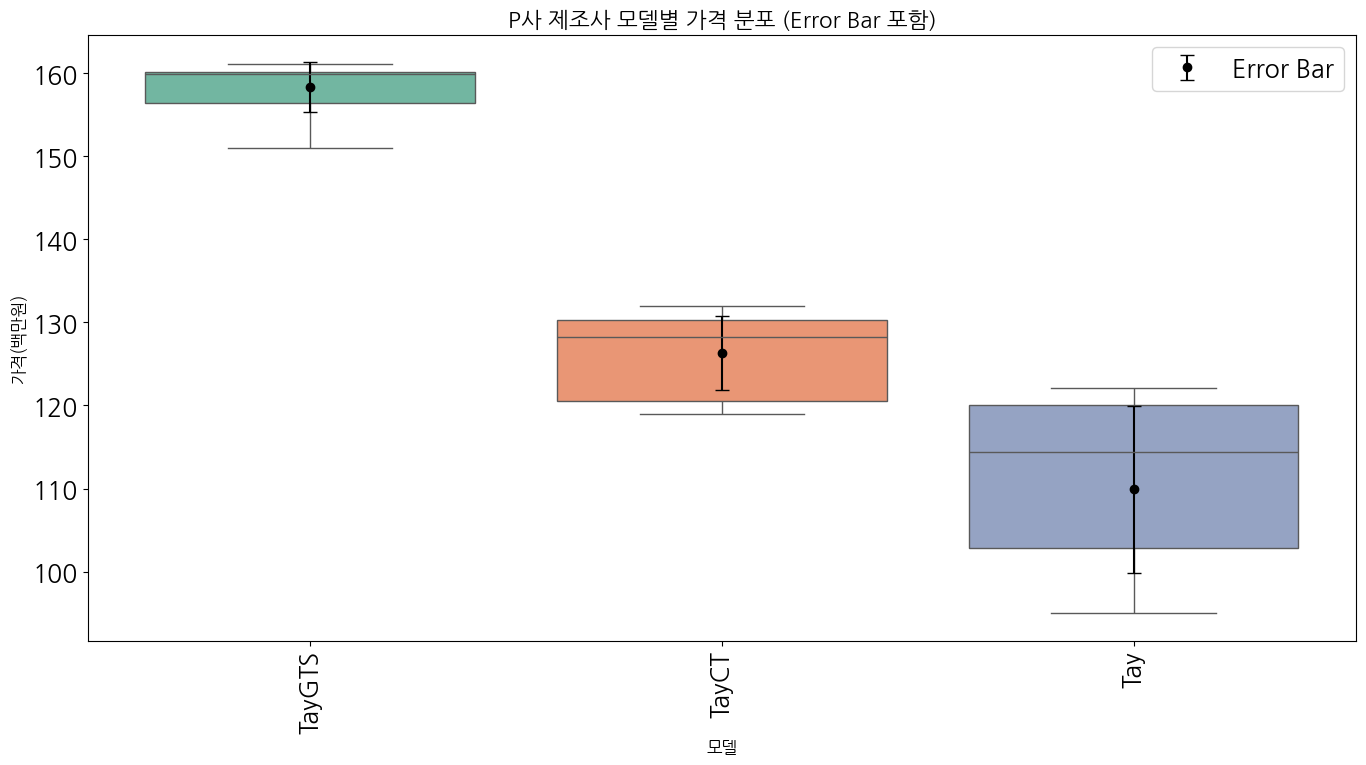

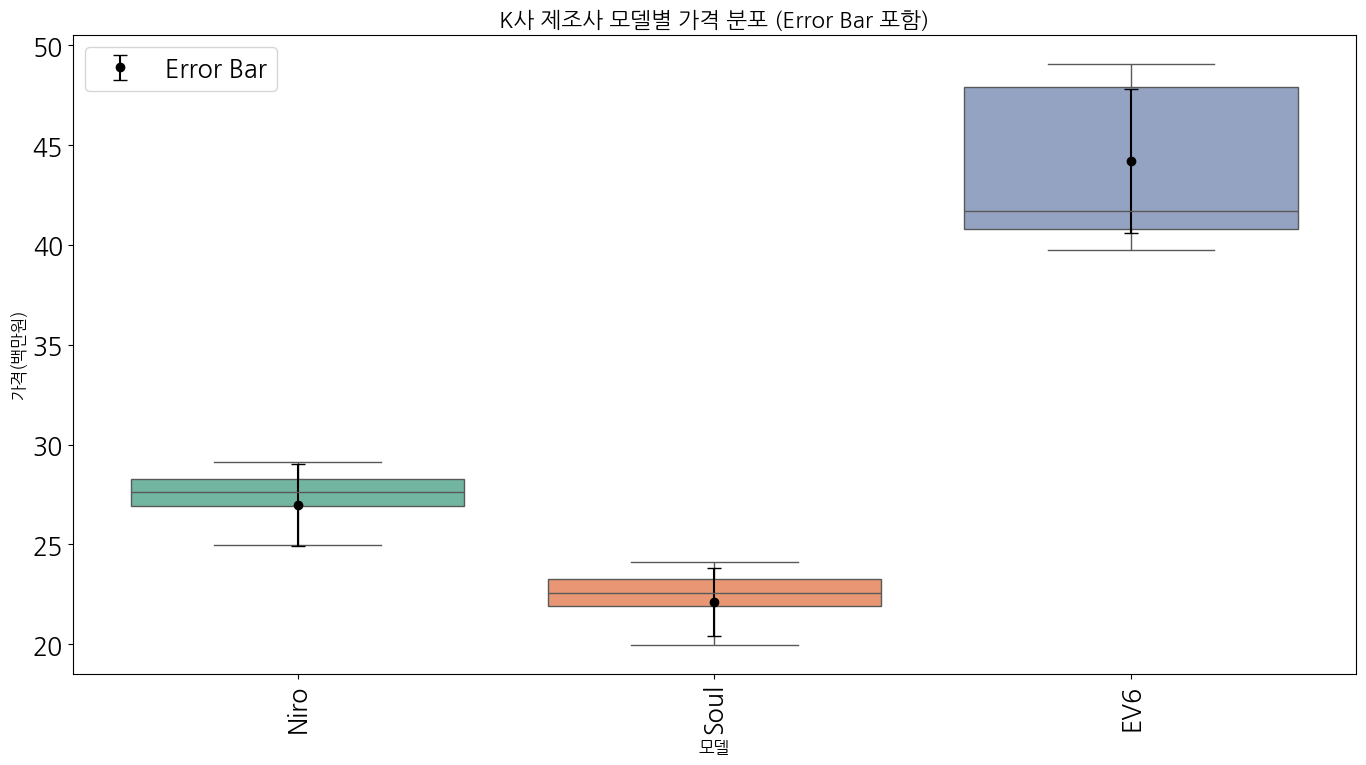

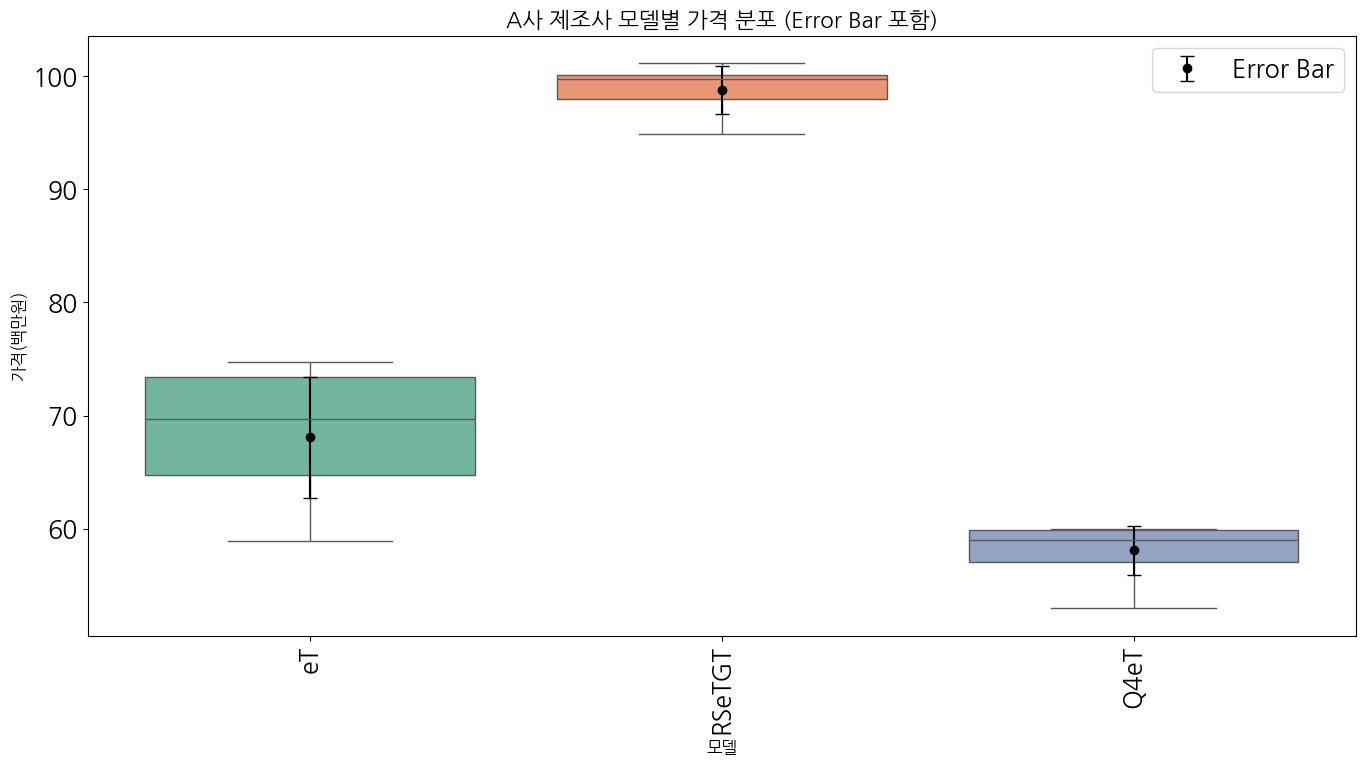

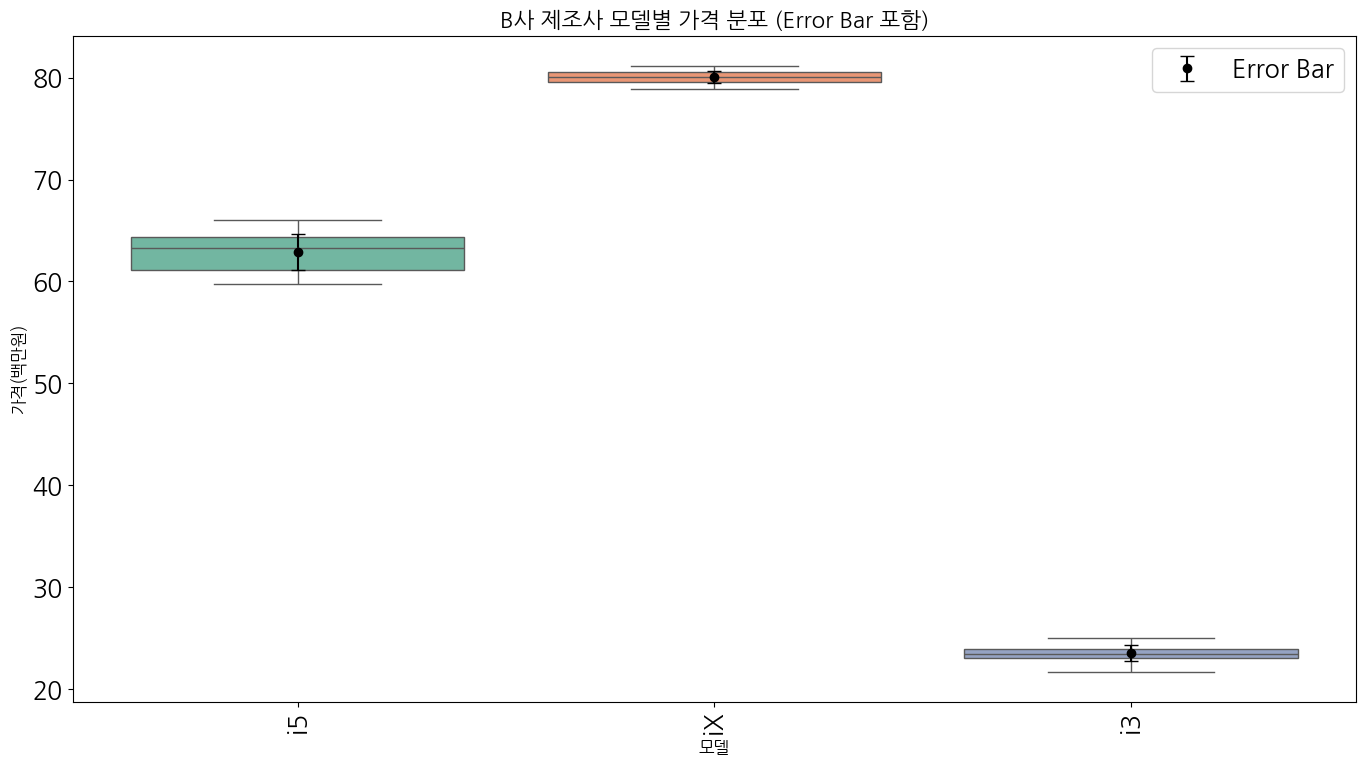

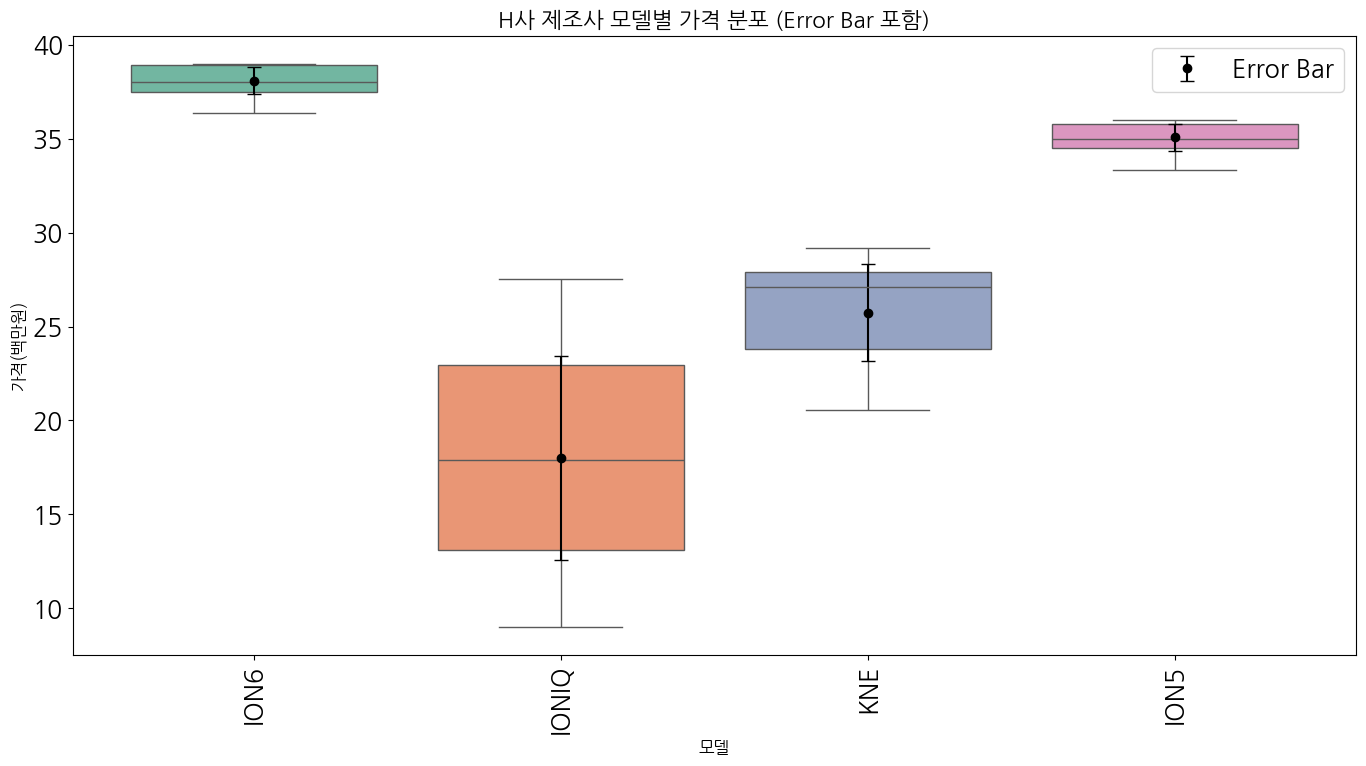

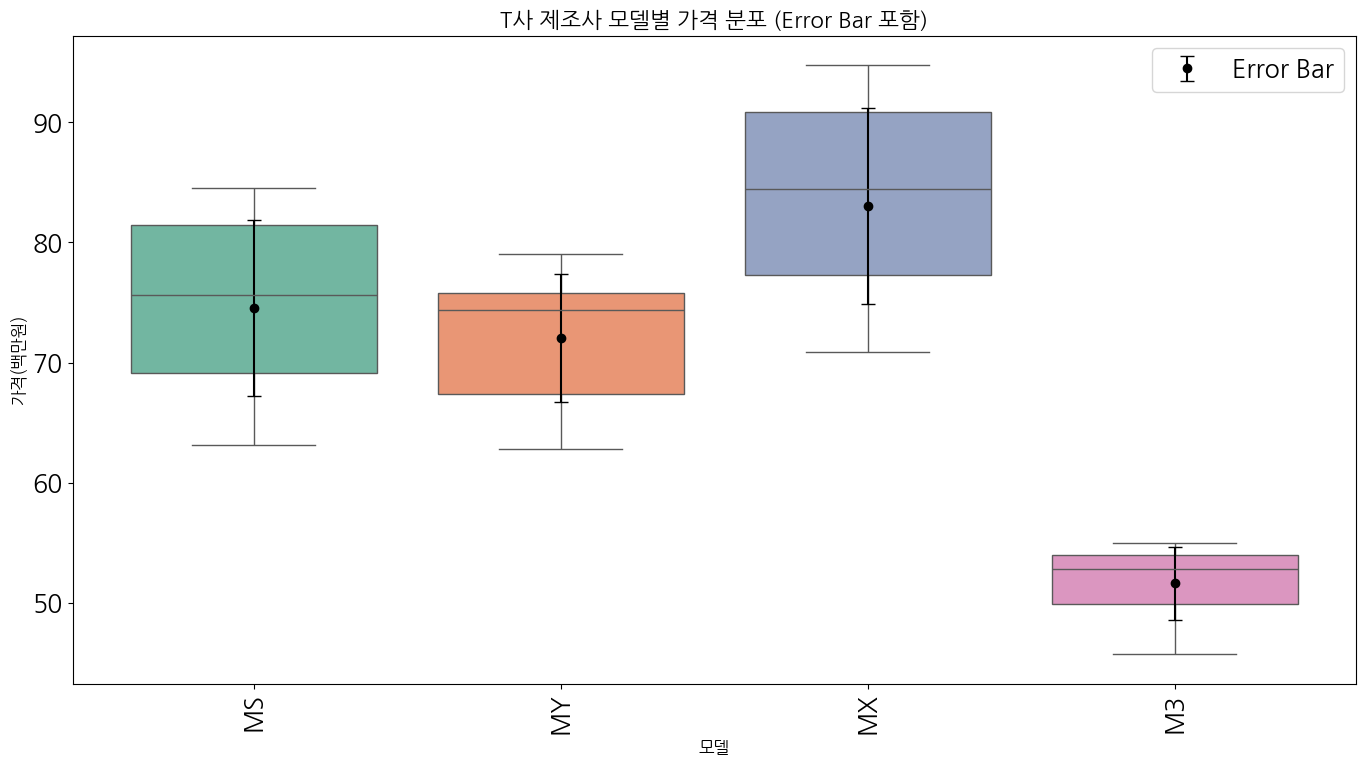

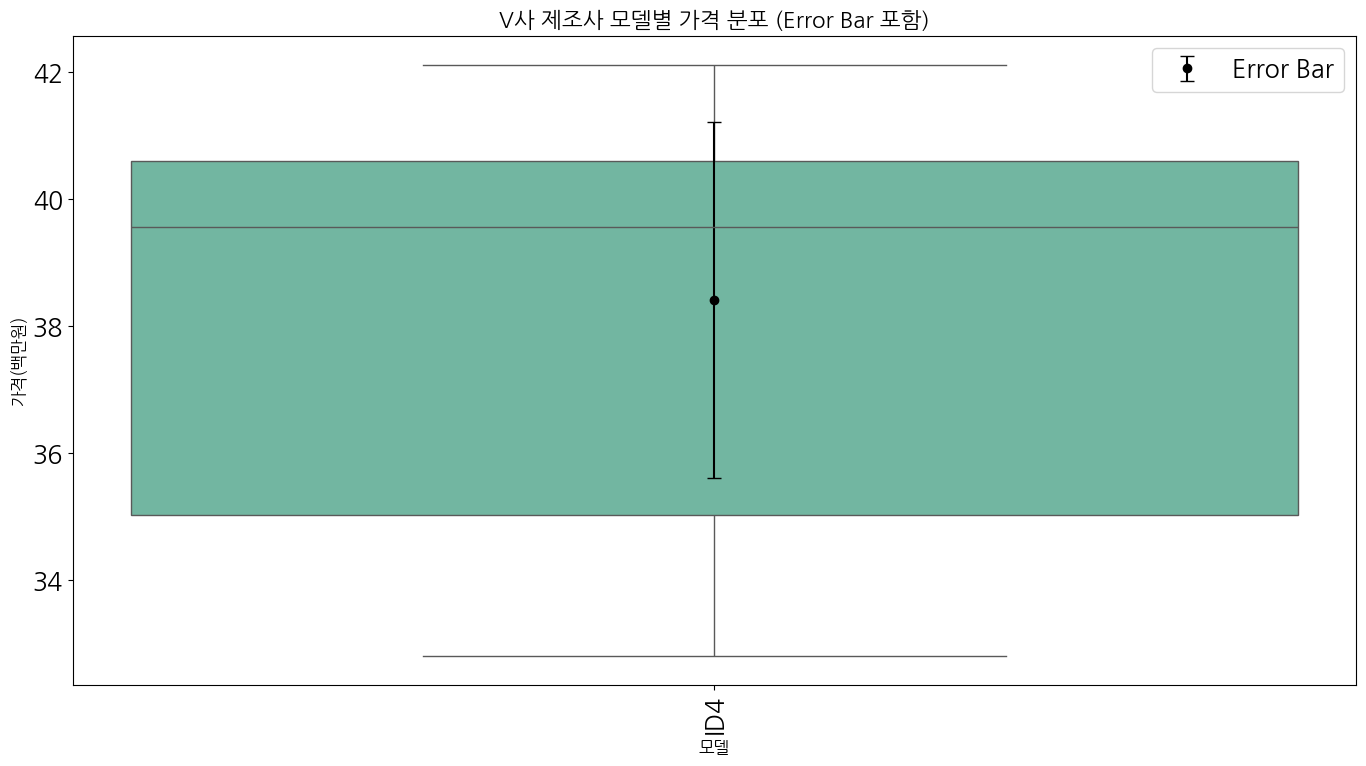

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 제조사 리스트 가져오기
manufacturers = train['제조사'].unique()

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# 각 제조사별로 그래프를 그립니다.
for idx, manufacturer in enumerate(manufacturers):
    plt.figure(figsize=(14, 8))  # 각 그래프마다 크기를 설정
    manufacturer_data = train[train['제조사'] == manufacturer]

    # 박스플롯 생성 (제조사 내에서 모델별 가격 분포)
    ax = sns.boxplot(data=manufacturer_data, x='모델', y='가격(백만원)', palette='Set2', showfliers=False)

    # x축 위치와 모델명 가져오기
    x_positions = ax.get_xticks()  # x축 위치
    x_labels = [label.get_text() for label in ax.get_xticklabels()]  # 모델명

    # 각 모델별 평균과 표준편차 계산
    model_avg_std = manufacturer_data.groupby('모델')['가격(백만원)'].agg([np.mean, np.std])

    # 평균과 표준편차를 error bar로 추가
    for model, xpos in zip(x_labels, x_positions):
        mean = model_avg_std.loc[model, 'mean']
        std = model_avg_std.loc[model, 'std']
        ax.errorbar(xpos, mean, yerr=std, fmt='o', color='black', capsize=5, label="Error Bar" if model == x_labels[0] else "")

    # 그래프 제목과 레이블 설정
    plt.title(f'{manufacturer} 제조사 모델별 가격 분포 (Error Bar 포함)', fontsize=16)
    plt.xlabel('모델', fontsize=12)
    plt.ylabel('가격(백만원)', fontsize=12)

    # X축 레이블이 겹치지 않도록 회전
    plt.xticks(rotation=90)

    # 범례 추가
    plt.legend()

    # 그래프 표시
    plt.tight_layout()
    plt.show()


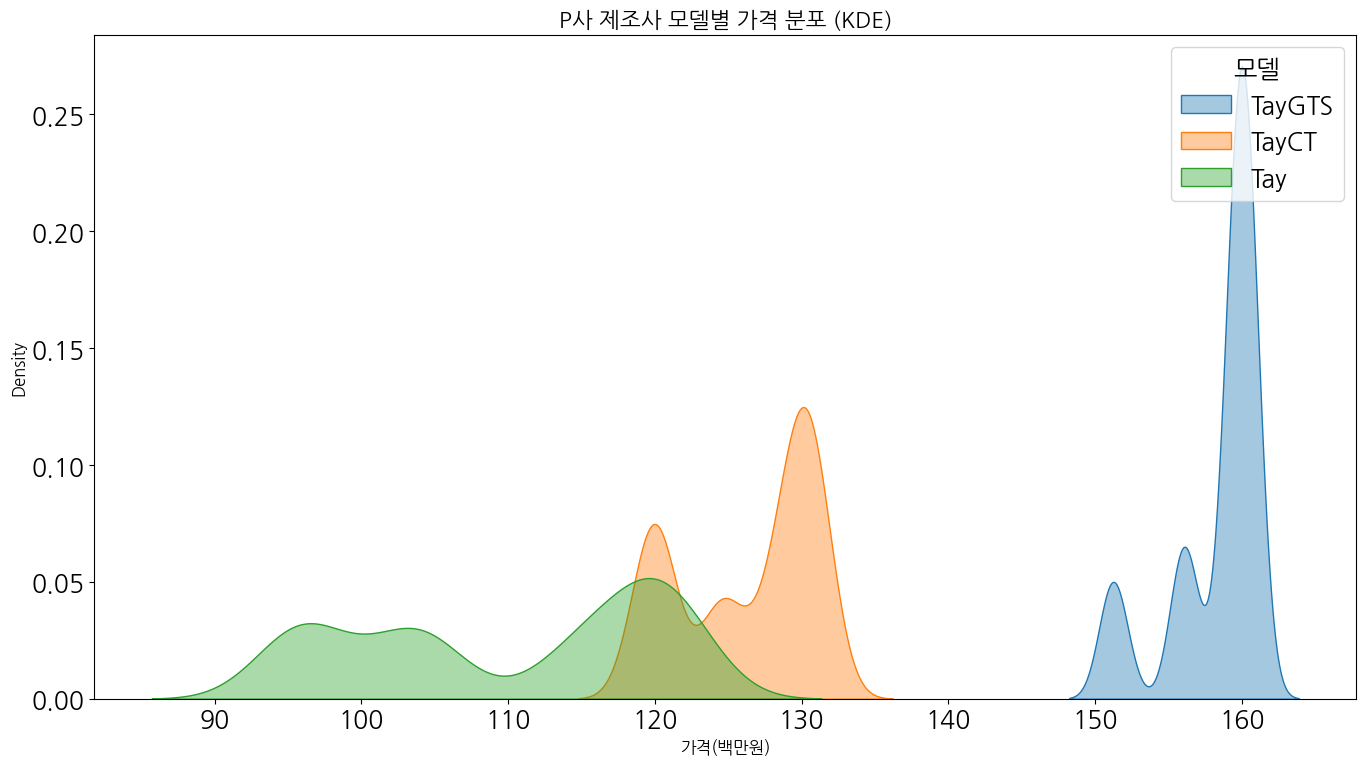

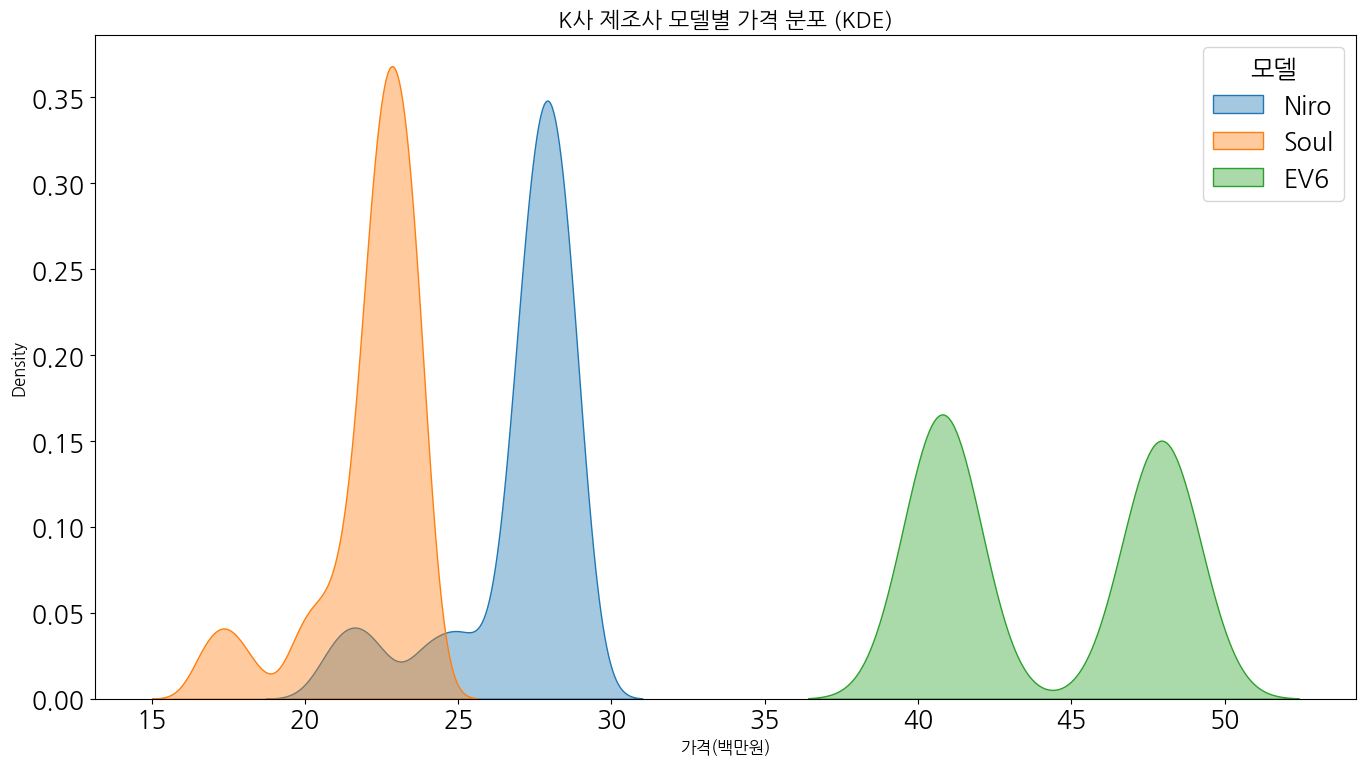

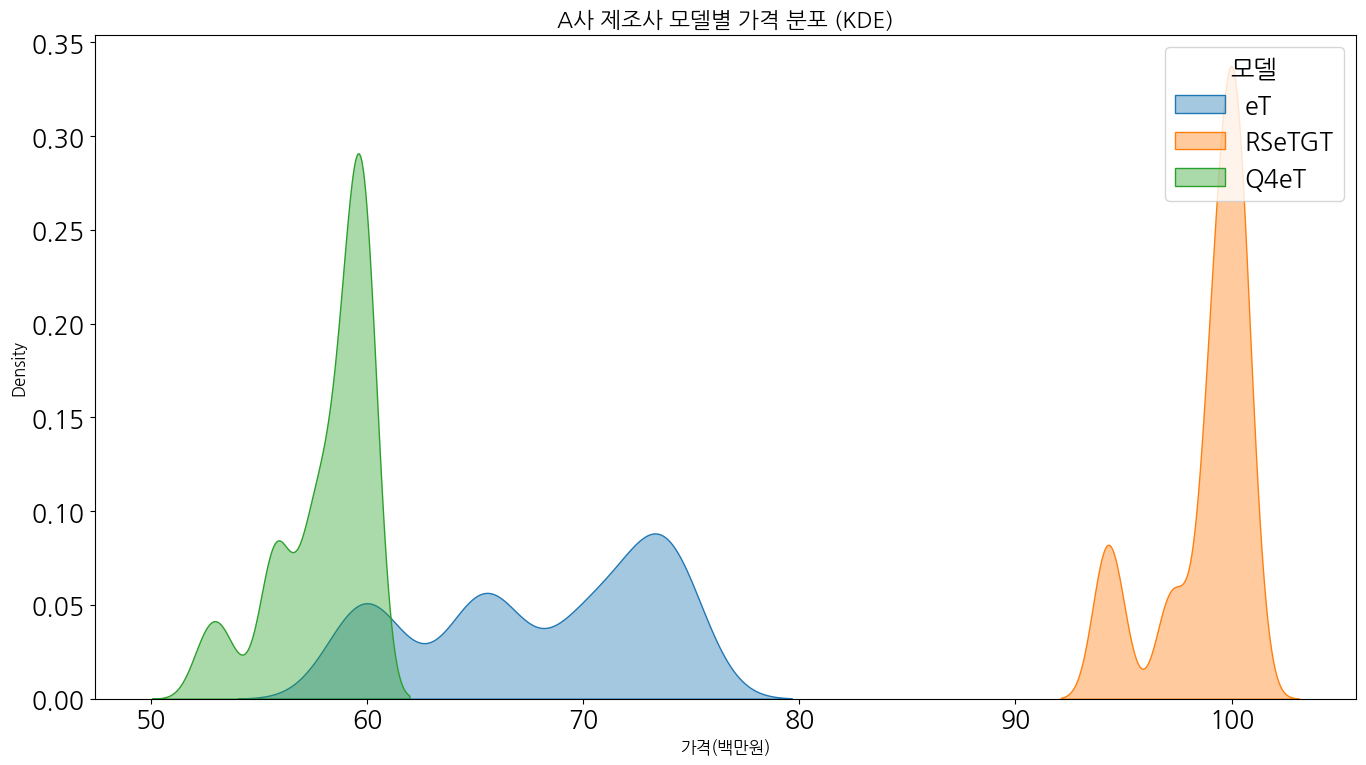

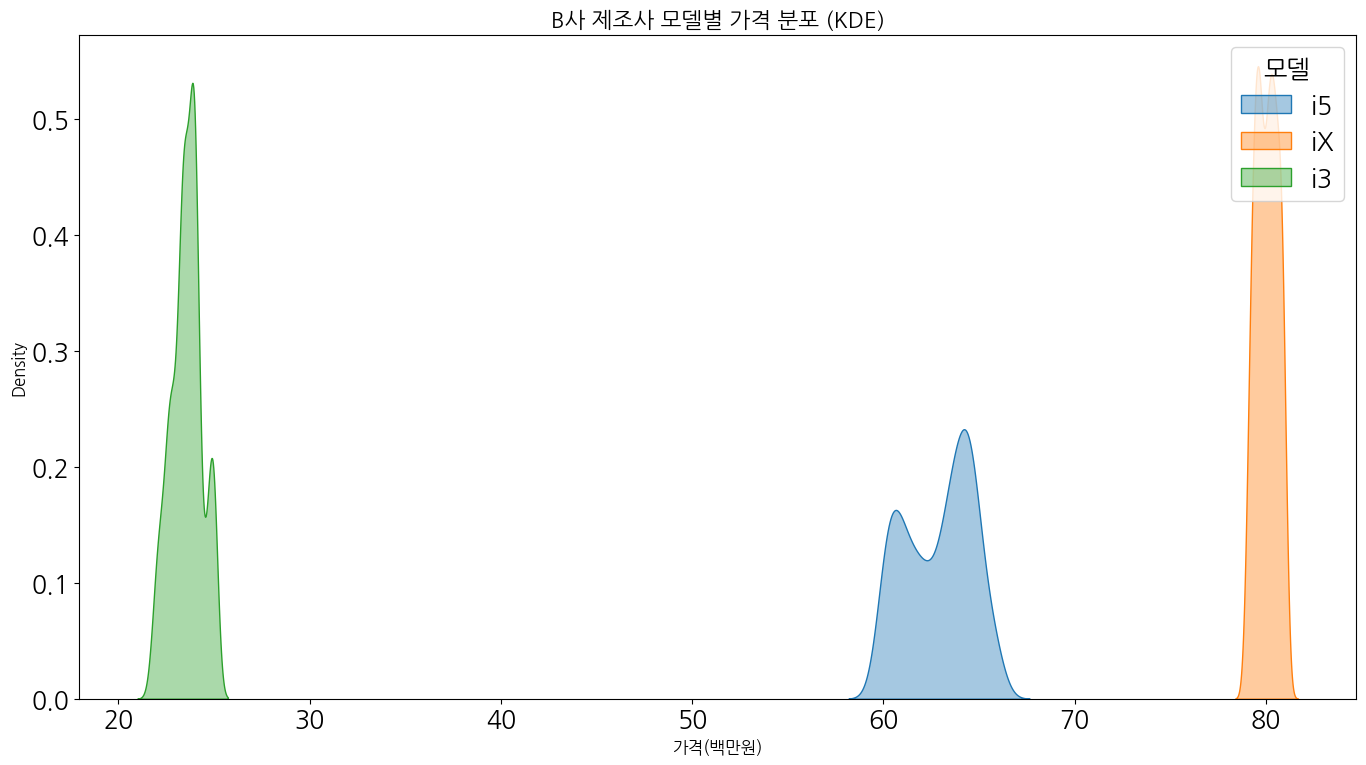

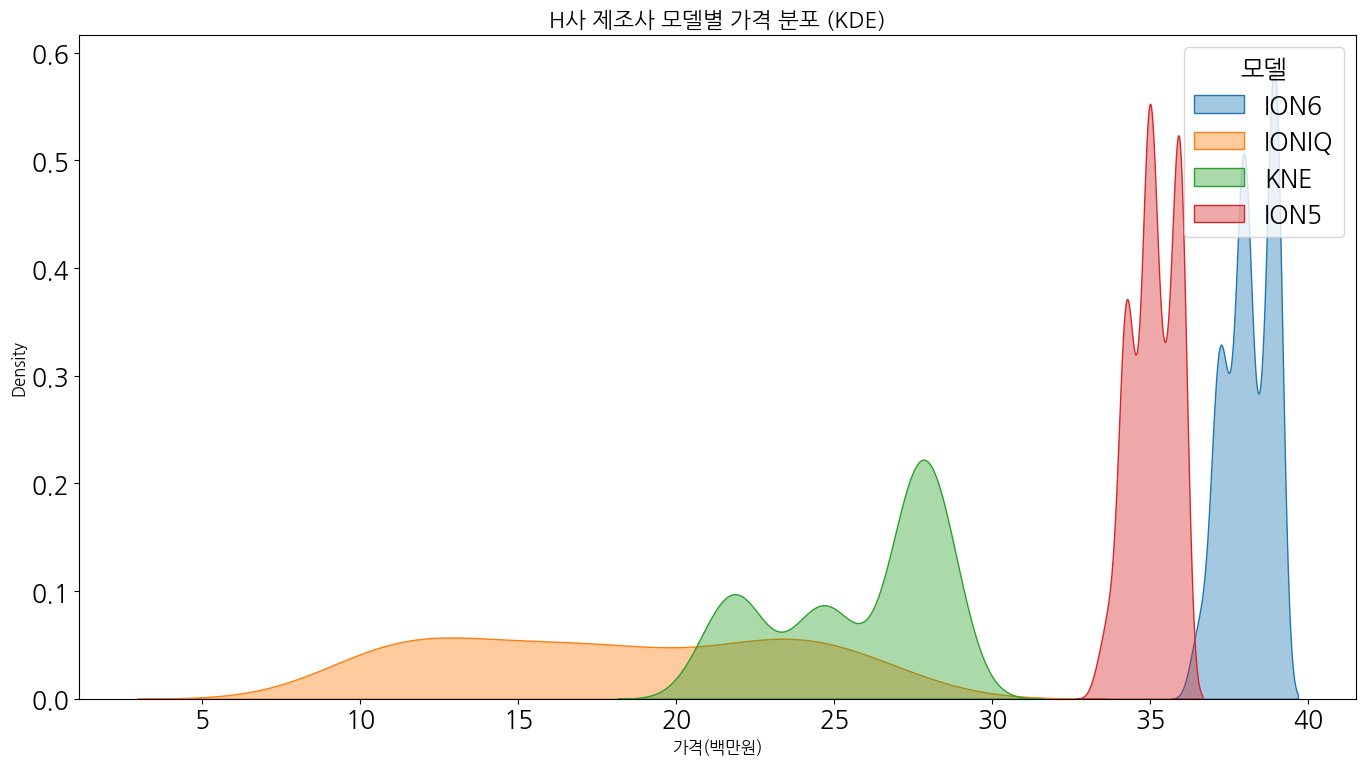

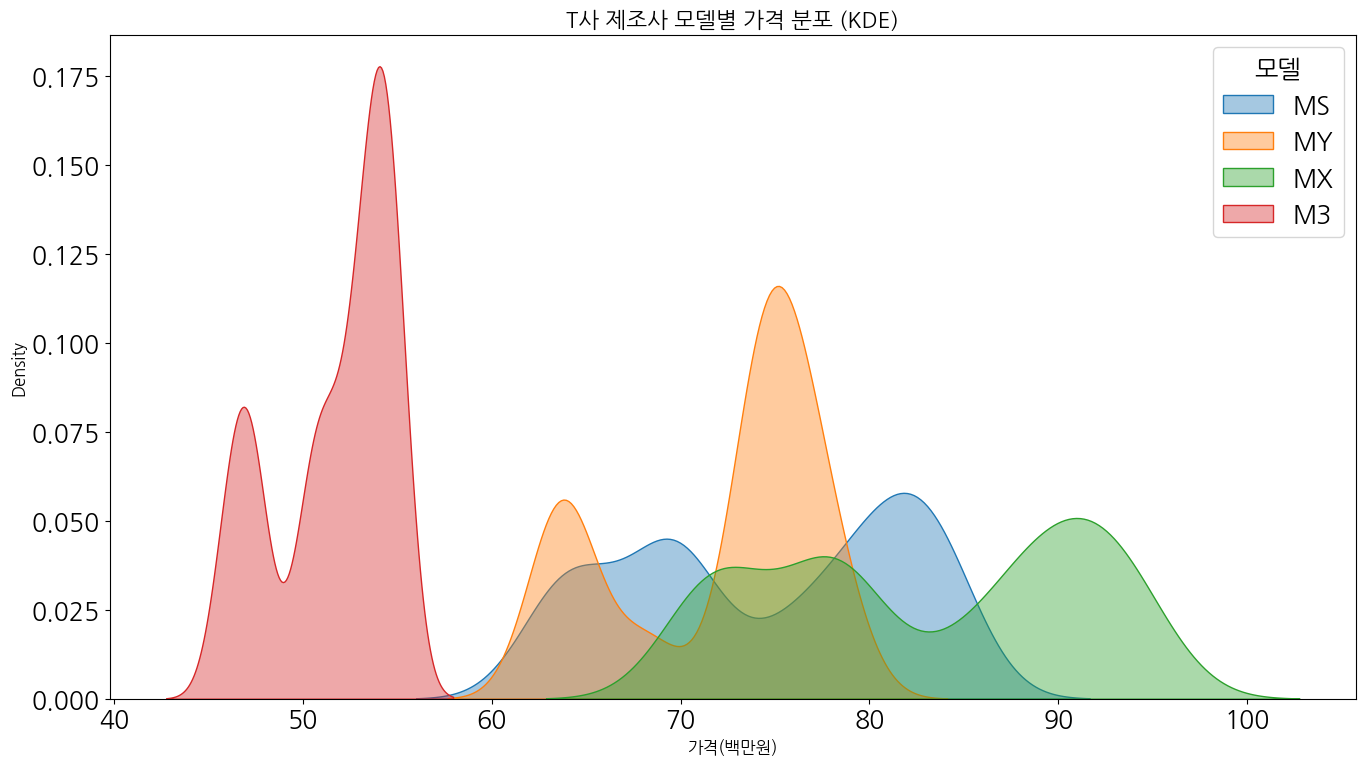

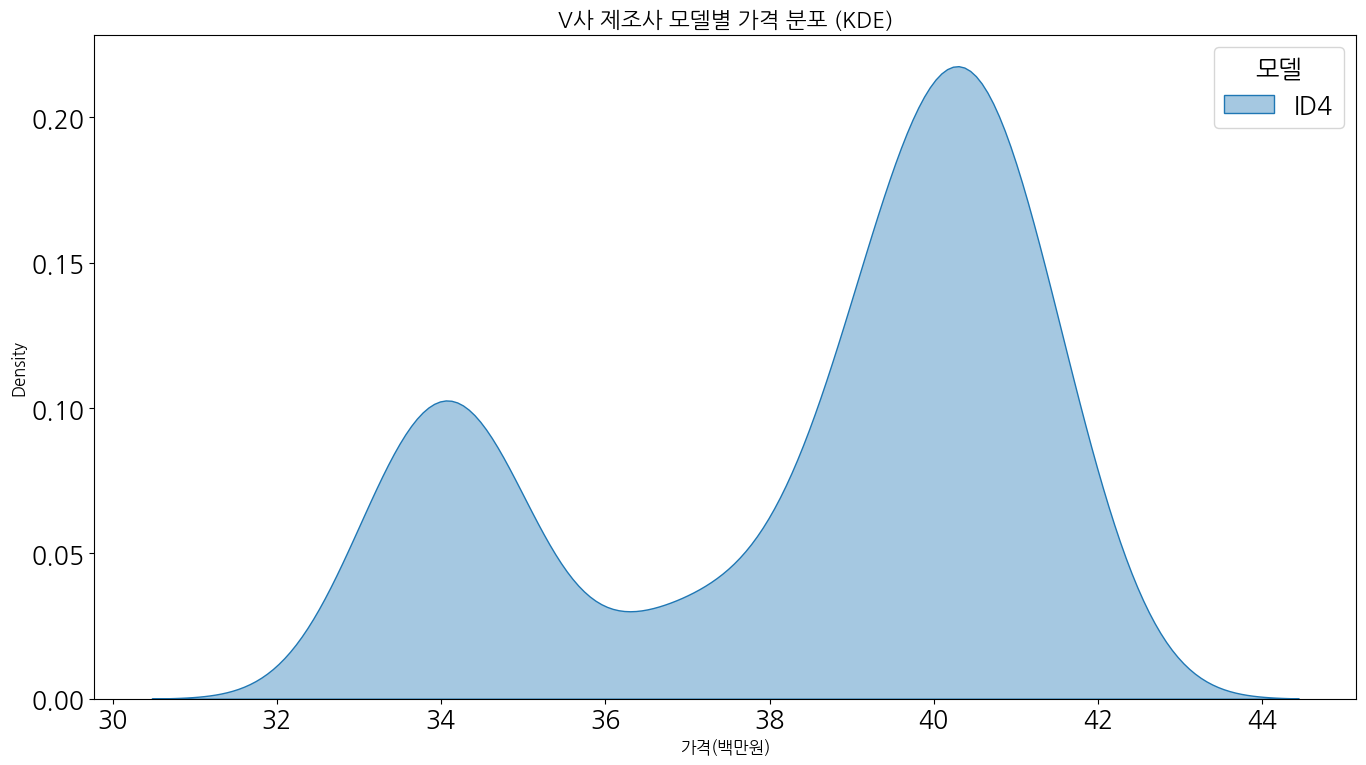

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 제조사 리스트 가져오기
manufacturers = train['제조사'].unique()

# 각 제조사별로 그래프를 그립니다.
for manufacturer in manufacturers:
    plt.figure(figsize=(14, 8))  # 각 그래프마다 크기를 설정
    manufacturer_data = train[train['제조사'] == manufacturer]

    # KDE 플롯: 모델별 가격 분포
    for model in manufacturer_data['모델'].unique():
        model_data = manufacturer_data[manufacturer_data['모델'] == model]
        sns.kdeplot(
            model_data['가격(백만원)'],
            label=model,
            fill=True,
            alpha=0.4
        )

    # 그래프 제목과 레이블 설정
    plt.title(f'{manufacturer} 제조사 모델별 가격 분포 (KDE)', fontsize=16)
    plt.xlabel('가격(백만원)', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # 범례 추가
    plt.legend(title='모델')

    # 그래프 표시
    plt.tight_layout()
    plt.show()

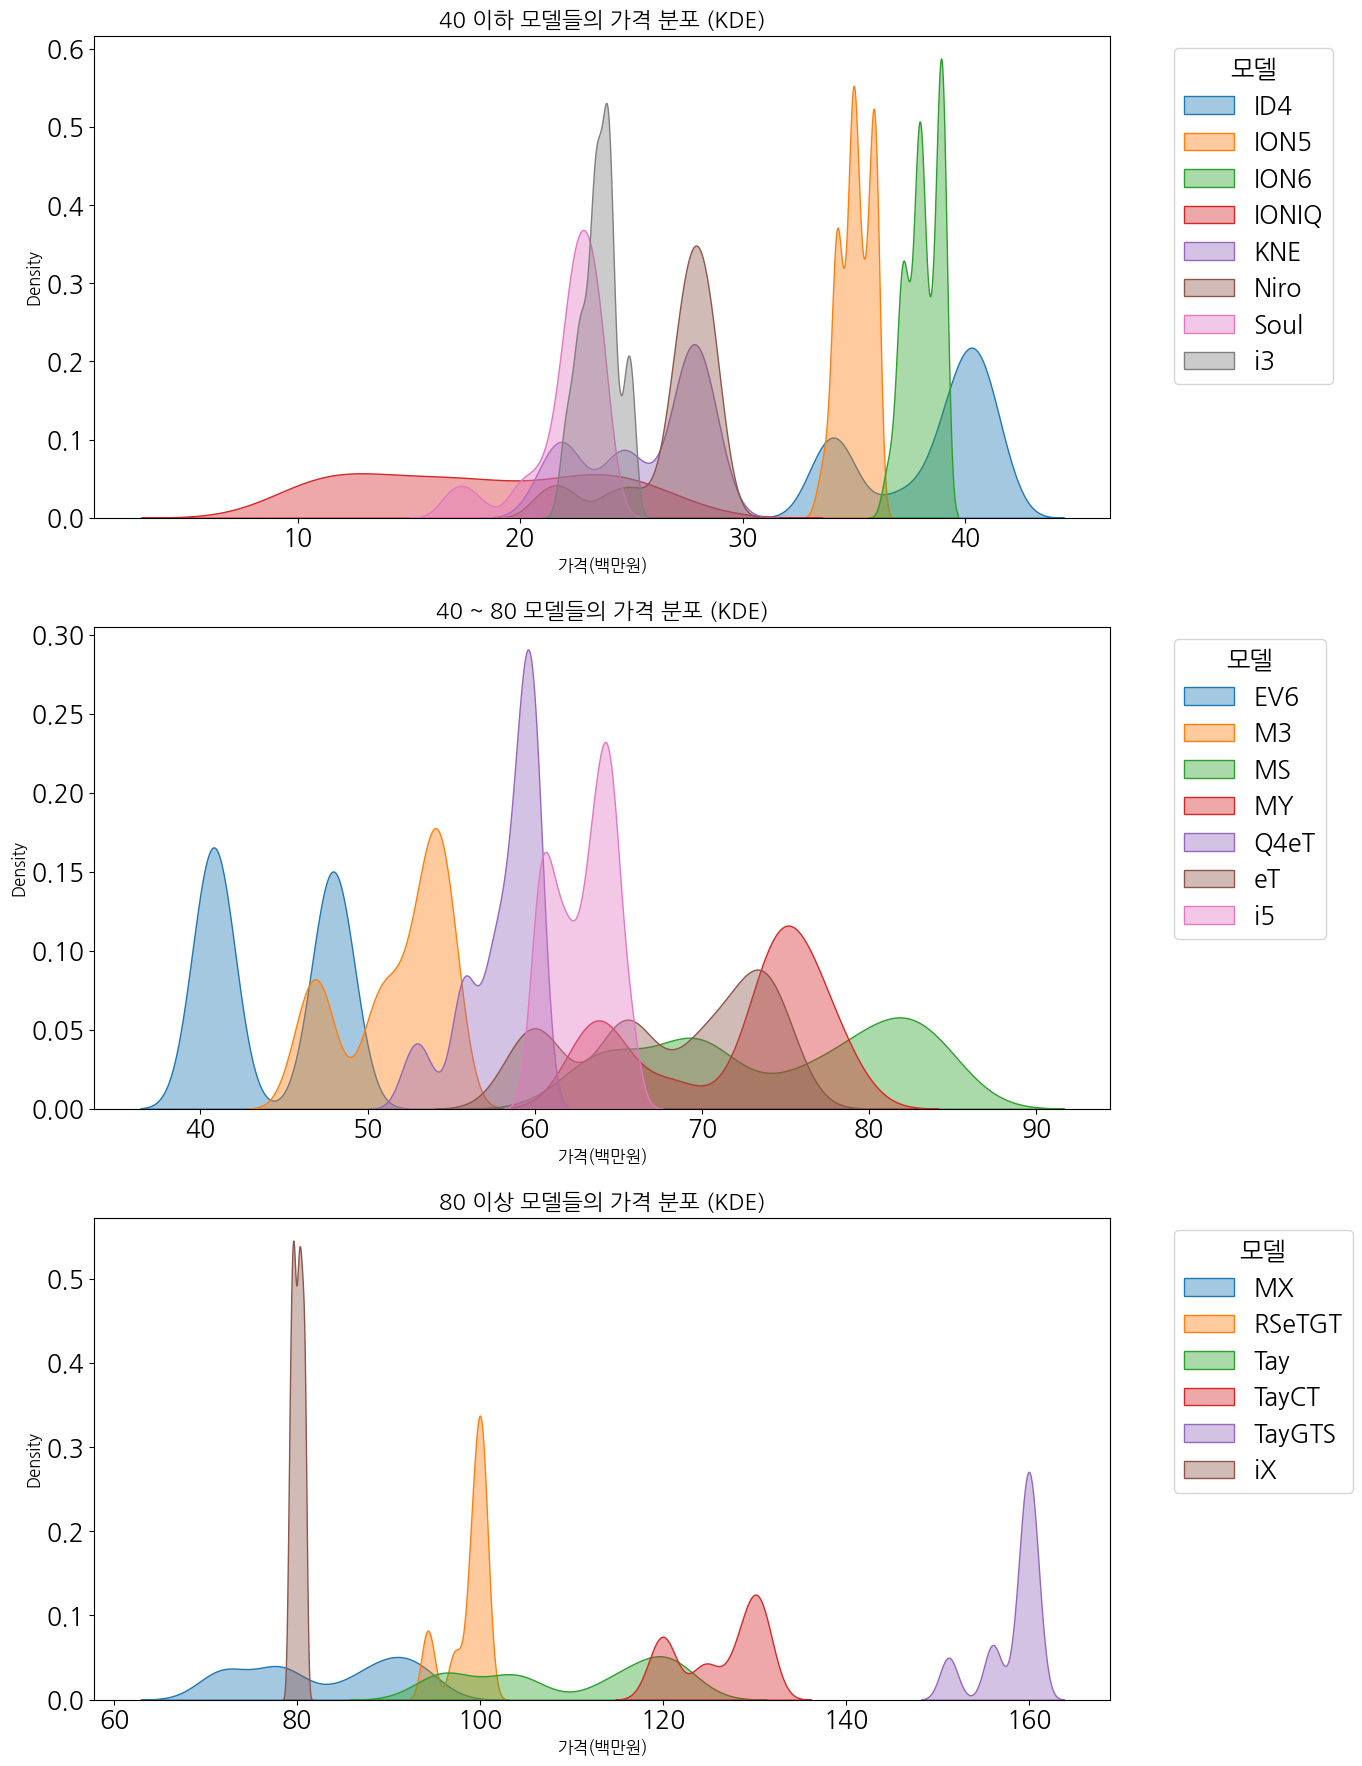

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델별 가격 평균 계산
model_avg_price = train.groupby('모델')['가격(백만원)'].mean()

# 가격 그룹을 나누는 기준: 모델별 평균 가격
bins = [0, 40, 80, float('inf')]  # 가격 그룹의 구간 설정
labels = ['40 이하', '40 ~ 80', '80 이상']

# 모델별 평균 가격을 기준으로 그룹을 할당
model_avg_price_group = pd.cut(model_avg_price, bins=bins, labels=labels)

# 그래프 크기 설정
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# 각 가격 그룹별로 모델별 가격 분포를 KDE 플롯으로 시각화
price_groups = ['40 이하', '40 ~ 80', '80 이상']
for i, group in enumerate(price_groups):
    ax = axes[i]

    # 해당 그룹에 속하는 모델들 찾기
    models_in_group = model_avg_price_group[model_avg_price_group == group].index

    for model in models_in_group:
        group_model_data = train[train['모델'] == model]
        sns.kdeplot(
            group_model_data['가격(백만원)'],
            label=model,
            fill=True,
            alpha=0.4,
            ax=ax
        )

    # 그래프 제목과 레이블 설정
    ax.set_title(f'{group} 모델들의 가격 분포 (KDE)', fontsize=16)
    ax.set_xlabel('가격(백만원)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(title='모델', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [ ]:
#가격분포가 넓은 것들
#MX, Tay, MS, MY, eT, IONIQ

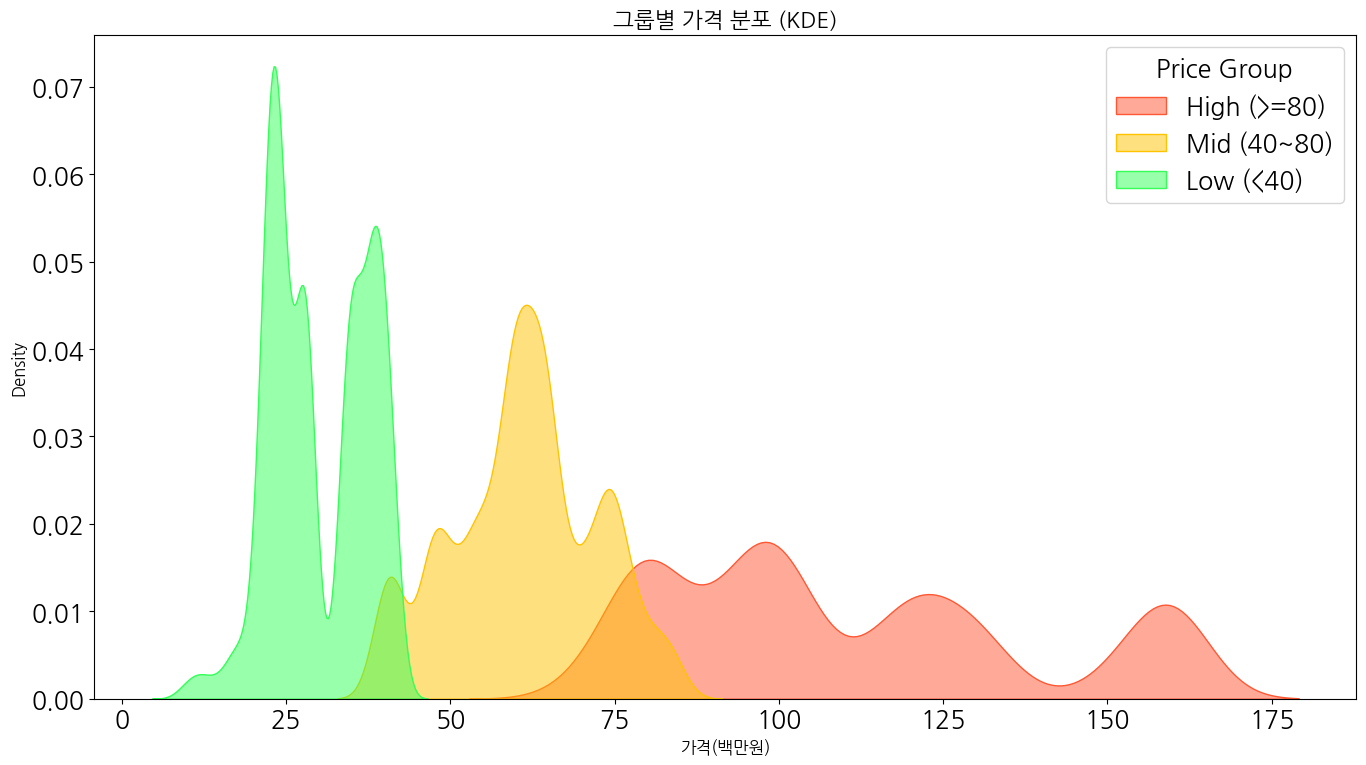

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델별 평균 가격 계산
model_avg_price = train.groupby('모델')['가격(백만원)'].mean()

# 모델을 그룹화 (80 이상, 80~40, 40 이하)
high_group = model_avg_price[model_avg_price >= 80].index
mid_group = model_avg_price[(model_avg_price < 80) & (model_avg_price >= 40)].index
low_group = model_avg_price[model_avg_price < 40].index

# 그룹별로 KDE 플롯 시각화
groups = {'High (>=80)': high_group, 'Mid (40~80)': mid_group, 'Low (<40)': low_group}
colors = ['#FF5733', '#FFC300', '#33FF57']  # 그룹별 색상 설정

# 그래프 그리기
plt.figure(figsize=(14, 8))

for (group_name, models), color in zip(groups.items(), colors):
    group_data = train[train['모델'].isin(models)]
    sns.kdeplot(
        group_data['가격(백만원)'],
        label=group_name,
        fill=True,
        alpha=0.5,
        color=color
    )

# 그래프 제목과 레이블 설정
plt.title('그룹별 가격 분포 (KDE)', fontsize=16)
plt.xlabel('가격(백만원)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# 범례 추가
plt.legend(title='Price Group', loc='upper right')

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

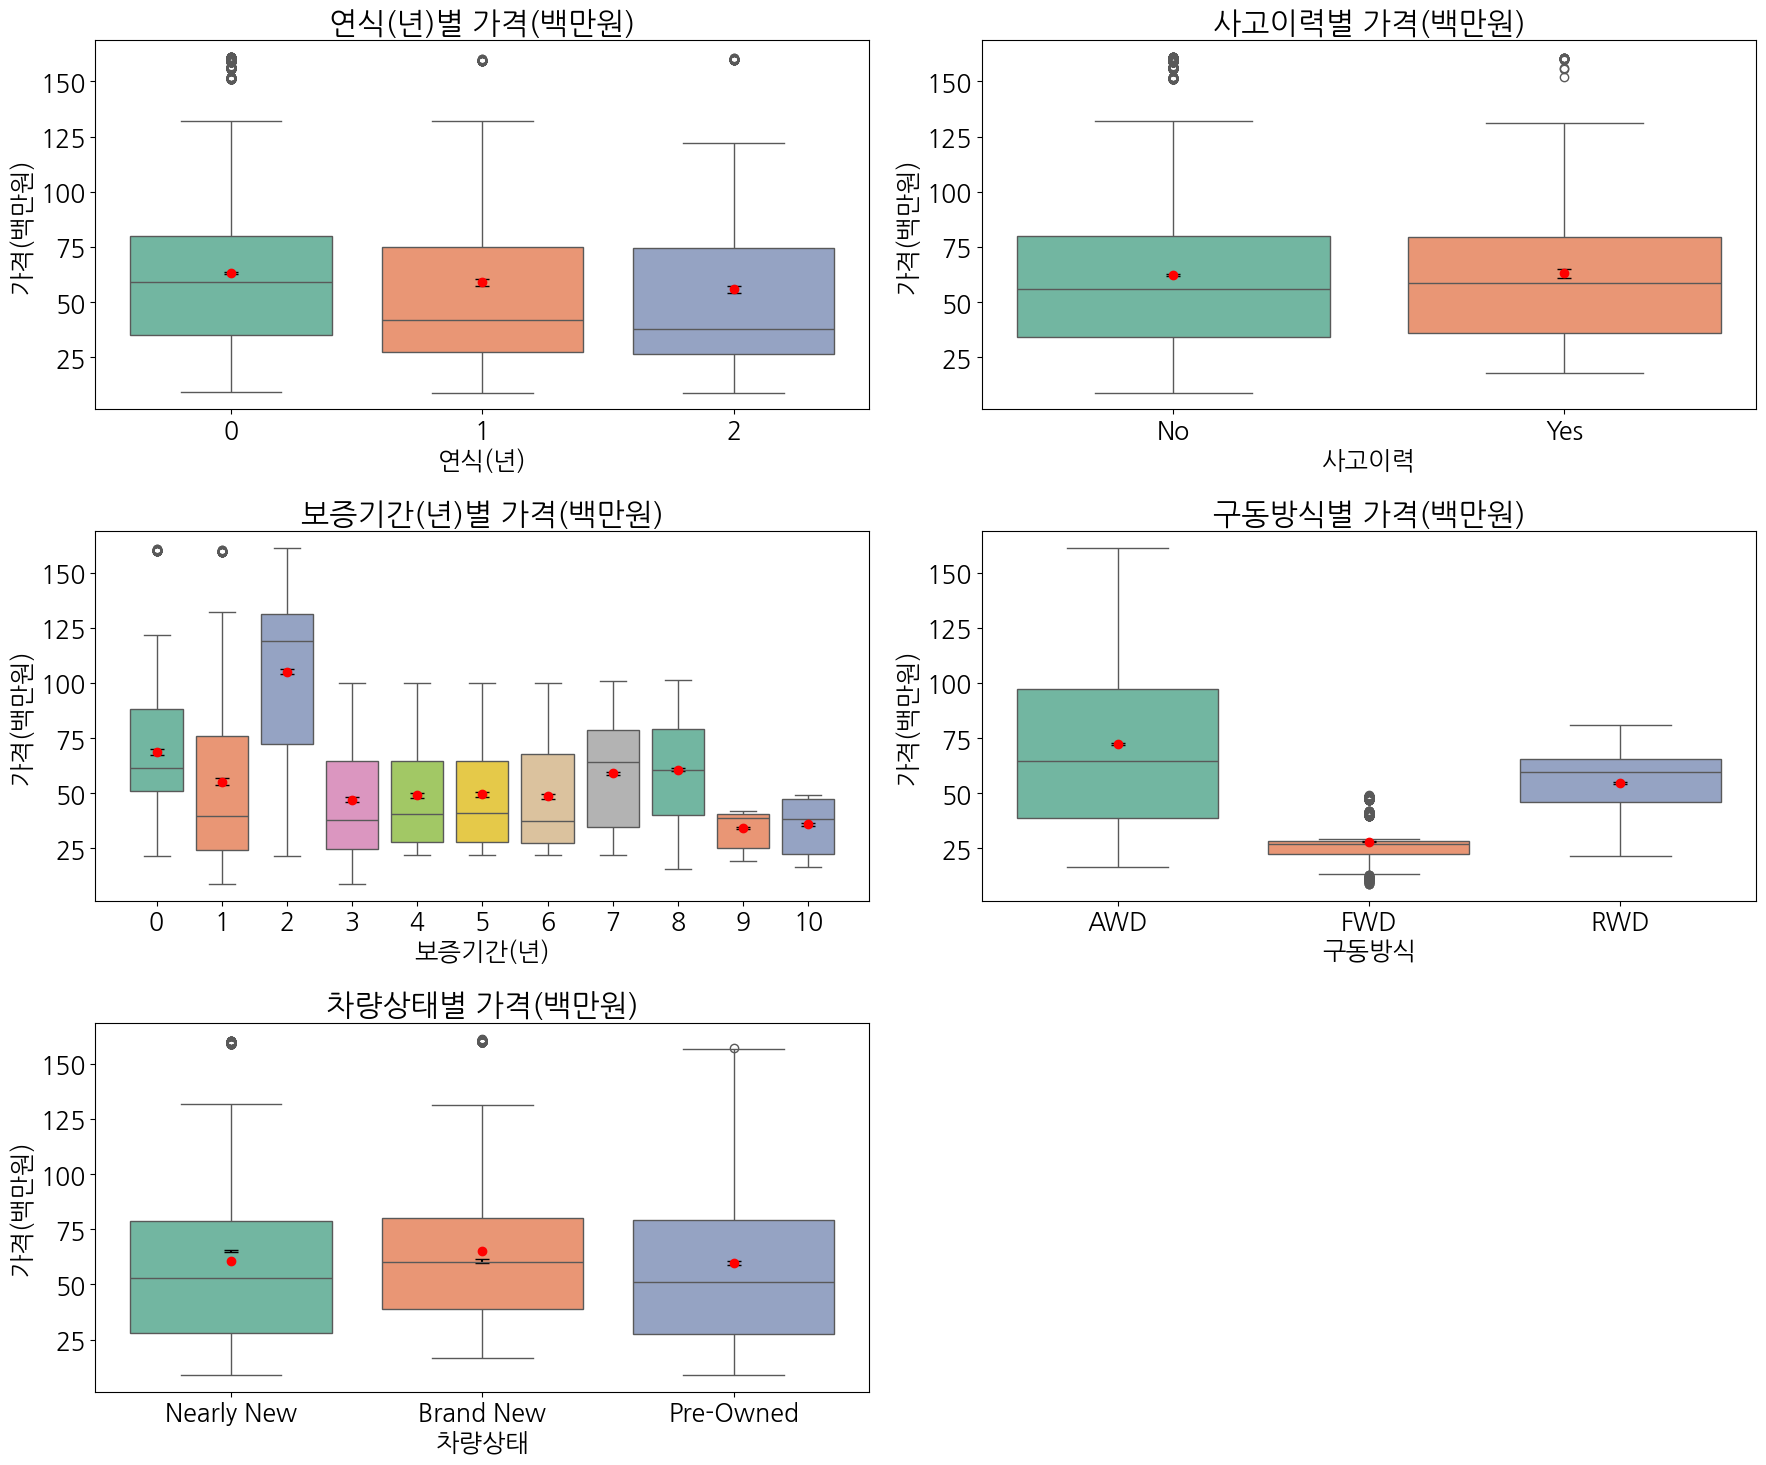

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임 로드 (train 데이터는 이미 준비되어 있다고 가정)
# train = pd.read_csv('your_data.csv')

# Boxplot을 생성하는 함수 정의
def create_boxplot_with_errorbar(df, x_column, y_column, ax):
    sns.boxplot(data=df, x=x_column, y=y_column, ax=ax, palette='Set2', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})

    # 그룹별로 평균과 표준편차 계산
    grouped = df.groupby(x_column)[y_column].agg(["mean", "std", "count"]).reset_index()
    grouped["stderr"] = grouped["std"] / np.sqrt(grouped["count"])

    # x축 위치 계산 (boxplot의 중앙값 위치에 오차막대를 추가)
    x_positions = range(len(grouped))

    ax.errorbar(
        x=x_positions,
        y=grouped["mean"],
        yerr=grouped["stderr"],
        fmt="none",
        c="black",
        capsize=5,
        linewidth=1.5,
    )
    ax.set_title(f'{x_column}별 {y_column}')

# 연속적으로 Boxplot 생성
columns_to_plot = ["연식(년)", "사고이력", "보증기간(년)", "구동방식", "차량상태"]
y_column = "가격(백만원)"

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    create_boxplot_with_errorbar(train, col, y_column, axes[i])

# 빈 subplot 제거
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

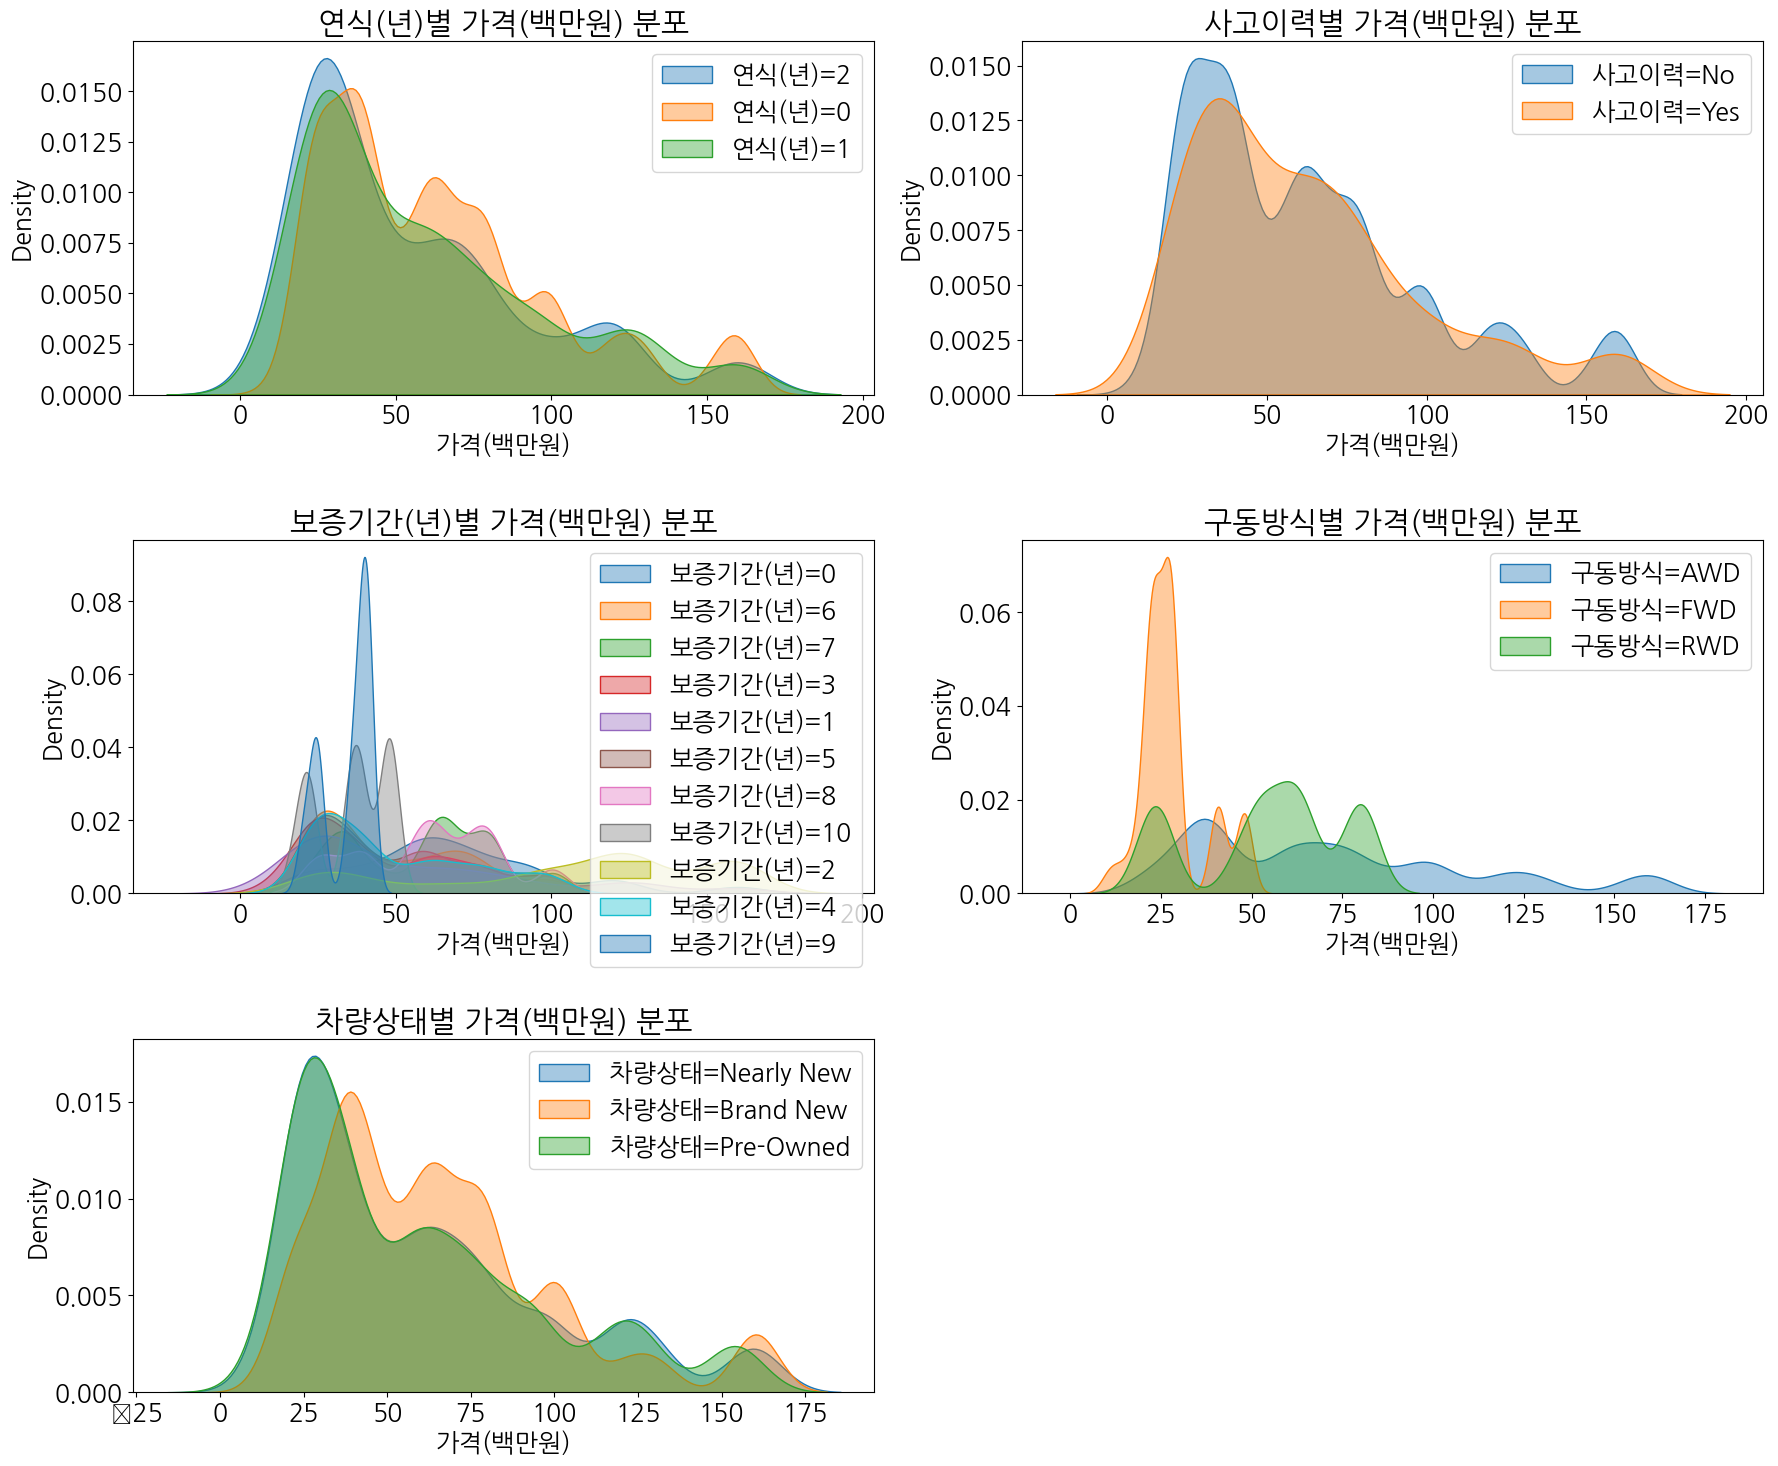

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (train 데이터는 이미 준비되어 있다고 가정)
# train = pd.read_csv('your_data.csv')

# KDE 플롯을 생성하는 함수 정의
def create_kdeplot(df, x_column, y_column, ax):
    for category in df[x_column].unique():
        subset = df[df[x_column] == category]
        sns.kdeplot(
            subset[y_column],
            ax=ax,
            label=f'{x_column}={category}',
            fill=True,
            alpha=0.4
        )
    ax.set_title(f'{x_column}별 {y_column} 분포')
    ax.set_xlabel(y_column)
    ax.set_ylabel('Density')
    ax.legend()

# 변수 설정
columns_to_plot = ["연식(년)", "사고이력", "보증기간(년)", "구동방식", "차량상태"]
y_column = "가격(백만원)"

# 서브플롯 생성
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

# 각 변수별 KDE 플롯 생성
for i, col in enumerate(columns_to_plot):
    create_kdeplot(train, col, y_column, axes[i])

# 빈 subplot 제거
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [27]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원),가격 그룹
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66,80 이상
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01,40 이하
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27,40 ~ 80
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16,80 이상
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02,40 ~ 80


In [30]:
train.select_dtypes(exclude='object').corr()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


In [38]:
import pandas as pd

# 모델별로 상관 행렬 계산
model_corr = {}

for model in train['모델'].unique():
    # 모델별 데이터 필터링
    model_data = train[train['모델'] == model]

    # 숫자형 데이터만 선택
    model_numeric_data = model_data.select_dtypes(exclude='object')

    # 상관 행렬 계산
    corr_matrix = model_numeric_data.corr()

    # 모델 이름과 함께 저장
    model_corr[model] = corr_matrix

# 모델별 상관 행렬 출력
for model, corr_matrix in model_corr.items():
    print(f"모델: {model}")
    display(corr_matrix)
    print("\n" + "="*50 + "\n")

모델: TayGTS


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.813005,-0.076711,0.076711,0.872679
주행거리(km),-0.813005,1.000000,0.092541,-0.092541,-0.815836
보증기간(년),-0.076711,0.092541,1.000000,-1.000000,-0.169977
연식(년),0.076711,-0.092541,-1.000000,1.000000,0.169977
가격(백만원),0.872679,-0.815836,-0.169977,0.169977,1.000000




모델: Niro


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.598206,0.824166,0.167078,-0.720017
주행거리(km),-0.598206,1.000000,-0.766953,-0.259576,0.373935
보증기간(년),0.824166,-0.766953,1.000000,0.353603,-0.601869
연식(년),0.167078,-0.259576,0.353603,1.000000,0.212973
가격(백만원),-0.720017,0.373935,-0.601869,0.212973,1.000000




모델: eT


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.828020,0.998379,0.048705,-0.787704
주행거리(km),-0.828020,1.000000,-0.826335,-0.074985,0.469764
보증기간(년),0.998379,-0.826335,1.000000,0.100663,-0.686511
연식(년),0.048705,-0.074985,0.100663,1.000000,0.414374
가격(백만원),-0.787704,0.469764,-0.686511,0.414374,1.000000




모델: RSeTGT


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.665635,0.877369,-0.287794,0.668488
주행거리(km),-0.665635,1.000000,-0.833867,-0.081160,-0.833990
보증기간(년),0.877369,-0.833867,1.000000,0.095060,0.903069
연식(년),-0.287794,-0.081160,0.095060,1.000000,0.086110
가격(백만원),0.668488,-0.833990,0.903069,0.086110,1.000000




모델: i5


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.719656,0.971852,0.587561,0.551248
주행거리(km),-0.719656,1.000000,-0.818047,-0.259327,-0.614983
보증기간(년),0.971852,-0.818047,1.000000,0.337014,0.696354
연식(년),0.587561,-0.259327,0.337014,1.000000,0.005990
가격(백만원),0.551248,-0.614983,0.696354,0.005990,1.000000




모델: ION6


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.701375,0.935509,0.185255,0.791020
주행거리(km),-0.701375,1.000000,-0.847010,-0.098055,-0.663056
보증기간(년),0.935509,-0.847010,1.000000,0.101733,0.834142
연식(년),0.185255,-0.098055,0.101733,1.000000,-0.207430
가격(백만원),0.791020,-0.663056,0.834142,-0.207430,1.000000




모델: MS


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.878689,0.998393,0.074327,-0.862694
주행거리(km),-0.878689,1.000000,-0.845925,-0.095176,0.549811
보증기간(년),0.998393,-0.845925,1.000000,0.110735,-0.783068
연식(년),0.074327,-0.095176,0.110735,1.000000,0.209350
가격(백만원),-0.862694,0.549811,-0.783068,0.209350,1.000000




모델: MY


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.676481,0.920586,0.193245,-0.500080
주행거리(km),-0.676481,1.000000,-0.843960,-0.097143,0.386947
보증기간(년),0.920586,-0.843960,1.000000,0.110457,-0.455543
연식(년),0.193245,-0.097143,0.110457,1.000000,-0.141116
가격(백만원),-0.500080,0.386947,-0.455543,-0.141116,1.000000




모델: Q4eT


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.735329,0.958517,0.341849,0.238647
주행거리(km),-0.735329,1.000000,-0.855064,-0.100760,-0.483356
보증기간(년),0.958517,-0.855064,1.000000,0.104570,0.513249
연식(년),0.341849,-0.100760,0.104570,1.000000,-0.716595
가격(백만원),0.238647,-0.483356,0.513249,-0.716595,1.000000




모델: ID4


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.656865,0.926483,0.209018,-0.472025
주행거리(km),-0.656865,1.000000,-0.821695,-0.090145,0.334571
보증기간(년),0.926483,-0.821695,1.000000,0.104036,-0.391557
연식(년),0.209018,-0.090145,0.104036,1.000000,-0.031484
가격(백만원),-0.472025,0.334571,-0.391557,-0.031484,1.000000




모델: TayCT


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.389641,0.183851,-0.183851,-0.090239
주행거리(km),-0.389641,1.000000,0.104303,-0.104303,0.024681
보증기간(년),0.183851,0.104303,1.000000,-1.000000,0.329984
연식(년),-0.183851,-0.104303,-1.000000,1.000000,-0.329984
가격(백만원),-0.090239,0.024681,0.329984,-0.329984,1.000000




모델: Soul


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.640363,0.811789,0.301713,-0.476319
주행거리(km),-0.640363,1.000000,-0.806426,-0.280303,0.360327
보증기간(년),0.811789,-0.806426,1.000000,0.374515,-0.529239
연식(년),0.301713,-0.280303,0.374515,1.000000,0.261799
가격(백만원),-0.476319,0.360327,-0.529239,0.261799,1.000000




모델: iX


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,NaN,NaN,NaN,NaN,NaN
주행거리(km),NaN,1.000000,0.028631,NaN,-0.041375
보증기간(년),NaN,0.028631,1.000000,NaN,-0.019876
연식(년),NaN,NaN,NaN,NaN,NaN
가격(백만원),NaN,-0.041375,-0.019876,NaN,1.000000




모델: MX


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.897915,0.998268,0.050554,-0.876929
주행거리(km),-0.897915,1.000000,-0.844304,-0.076159,0.591239
보증기간(년),0.998268,-0.844304,1.000000,0.097222,-0.802789
연식(년),0.050554,-0.076159,0.097222,1.000000,0.196935
가격(백만원),-0.876929,0.591239,-0.802789,0.196935,1.000000




모델: IONIQ


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,0.040190,0.042917,-0.097879,0.035659
주행거리(km),0.040190,1.000000,0.019544,0.006395,0.057235
보증기간(년),0.042917,0.019544,1.000000,0.037115,0.099766
연식(년),-0.097879,0.006395,0.037115,1.000000,0.056723
가격(백만원),0.035659,0.057235,0.099766,0.056723,1.000000




모델: EV6


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,NaN,NaN,NaN,NaN,NaN
주행거리(km),NaN,1.000000,-0.068755,NaN,-0.061697
보증기간(년),NaN,-0.068755,1.000000,NaN,0.987038
연식(년),NaN,NaN,NaN,NaN,NaN
가격(백만원),NaN,-0.061697,0.987038,NaN,1.000000




모델: KNE


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.441274,0.639349,-0.244733,-0.910502
주행거리(km),-0.441274,1.000000,-0.837027,-0.107199,0.545711
보증기간(년),0.639349,-0.837027,1.000000,0.119176,-0.738588
연식(년),-0.244733,-0.107199,0.119176,1.000000,0.359852
가격(백만원),-0.910502,0.545711,-0.738588,0.359852,1.000000




모델: M3


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.683092,0.924567,0.142611,-0.111935
주행거리(km),-0.683092,1.000000,-0.854827,-0.075887,0.082111
보증기간(년),0.924567,-0.854827,1.000000,0.078239,-0.071024
연식(년),0.142611,-0.075887,0.078239,1.000000,0.005590
가격(백만원),-0.111935,0.082111,-0.071024,0.005590,1.000000




모델: i3


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.664438,0.769938,0.214618,0.710268
주행거리(km),-0.664438,1.000000,-0.814926,-0.294888,-0.705995
보증기간(년),0.769938,-0.814926,1.000000,0.383271,0.860872
연식(년),0.214618,-0.294888,0.383271,1.000000,0.115747
가격(백만원),0.710268,-0.705995,0.860872,0.115747,1.000000




모델: ION5


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.727031,0.935874,0.152503,0.805235
주행거리(km),-0.727031,1.000000,-0.860825,-0.075135,-0.691677
보증기간(년),0.935874,-0.860825,1.000000,0.086809,0.830536
연식(년),0.152503,-0.075135,0.086809,1.000000,-0.176416
가격(백만원),0.805235,-0.691677,0.830536,-0.176416,1.000000




모델: Tay


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.725926,-0.209287,0.209287,-0.630803
주행거리(km),-0.725926,1.000000,0.080813,-0.080813,0.507819
보증기간(년),-0.209287,0.080813,1.000000,-1.000000,-0.400984
연식(년),0.209287,-0.080813,-1.000000,1.000000,0.400984
가격(백만원),-0.630803,0.507819,-0.400984,0.400984,1.000000
